In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn import linear_model

In [62]:
df = pd.read_csv('Health_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [63]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [65]:
df.shape

(1337, 7)

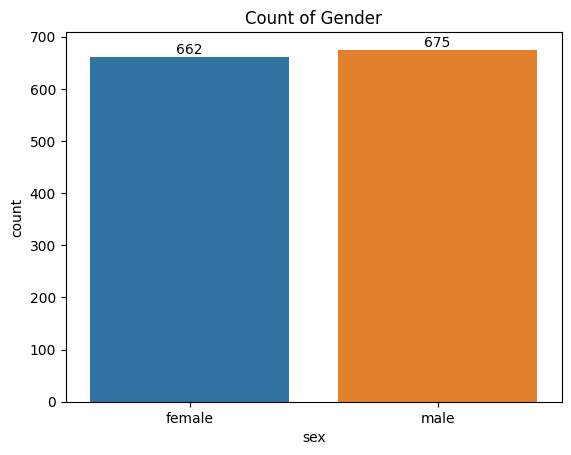

In [66]:
ax = sns.countplot(data = df,x = 'sex')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Count of Gender')
plt.show()


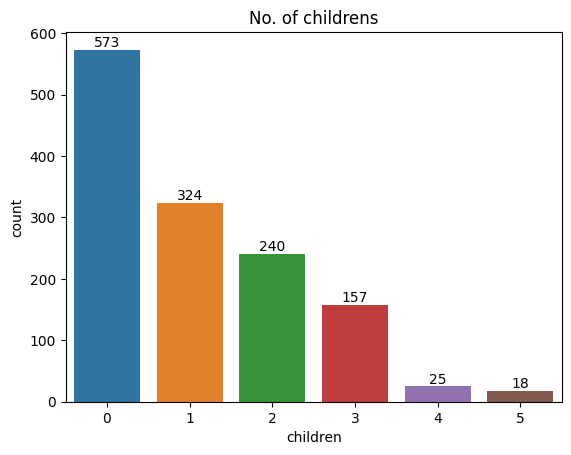

In [67]:
ax = sns.countplot(data = df,x = 'children')
for label in ax.containers:
    ax.bar_label(label)
plt.title('No. of childrens')
plt.show()

Text(0.5, 1.0, 'Age Range')

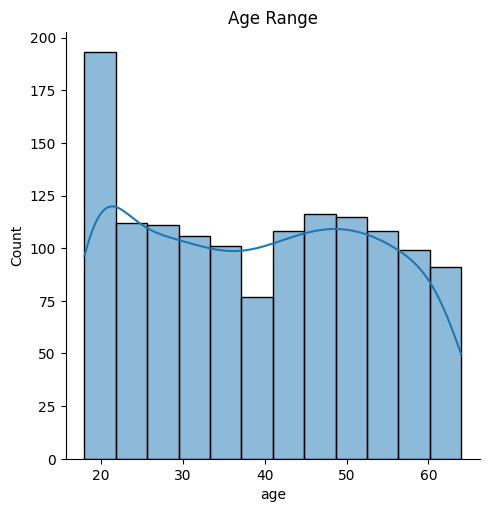

In [68]:
sns.displot(df['age'],kde = True)
plt.title('Age Range')

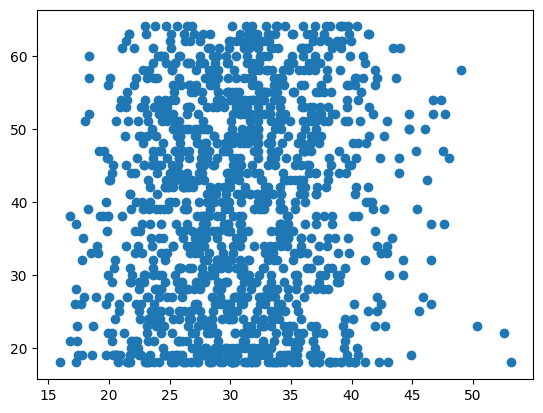

In [69]:
plt.scatter(df['bmi'],df['age'])

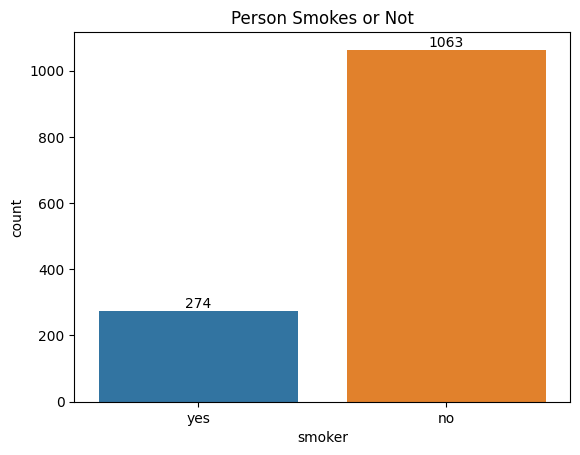

In [70]:
ax = sns.countplot(data = df,x = 'smoker')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Person Smokes or Not')
plt.show()

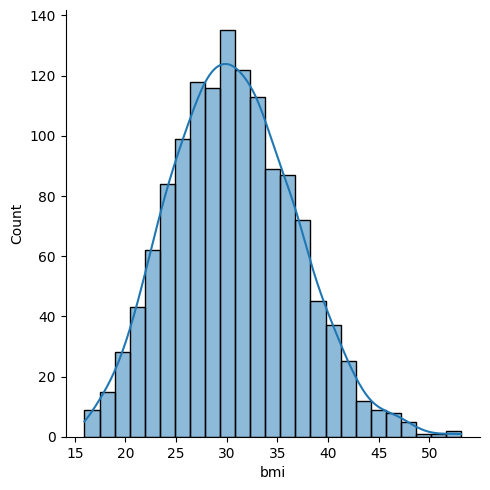

In [71]:
sns.displot(df['bmi'],kde = True)

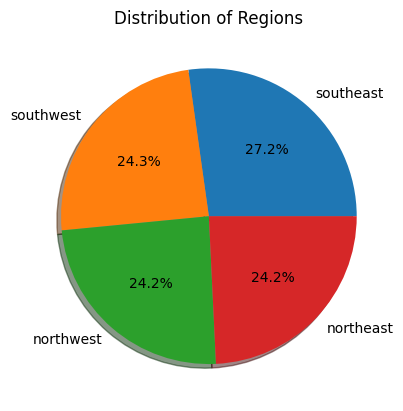

In [72]:
region_distribution = df['region'].value_counts()
plt.pie(region_distribution, labels=region_distribution.index, autopct='%1.1f%%',shadow = True)
# plt.axis('equal')
plt.title('Distribution of Regions')

plt.show()

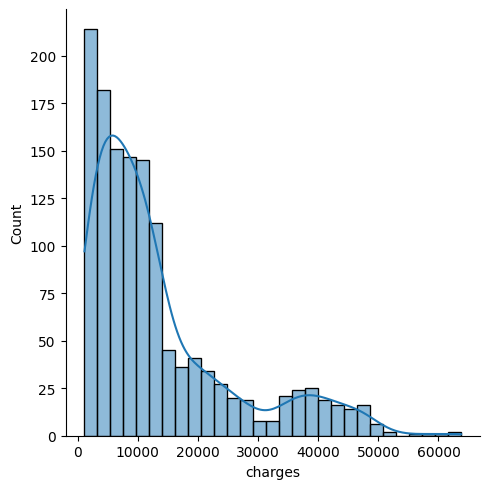

In [73]:
sns.displot(df['charges'],kde = True)

<Axes: >

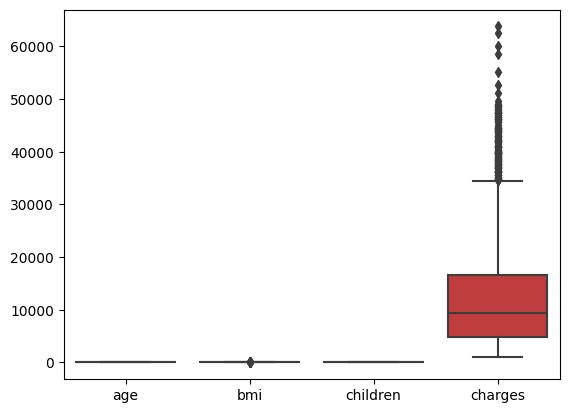

In [74]:
sns.boxplot(df)

In [76]:
df[df['charges']>45000].index

Index([  34,   39,   55,   94,  109,  175,  251,  265,  281,  288,  328,  330,
        420,  421,  488,  530,  543,  549,  569,  577,  668,  674,  677,  819,
        845,  860,  883,  901,  951, 1062, 1122, 1146, 1230, 1240, 1241, 1284,
       1300, 1301],
      dtype='int64')

In [77]:
df.drop([34,   39,   55,   94,  109,  175,  251,  265,  281,  288,  328,  330,
        420,  421,  488,  530,  543,  549,  569,  577,  668,  674,  677,  819,
        845,  860,  883,  901,  951, 1062, 1122, 1146, 1230, 1240, 1241, 1284,
       1300, 1301],inplace = True)

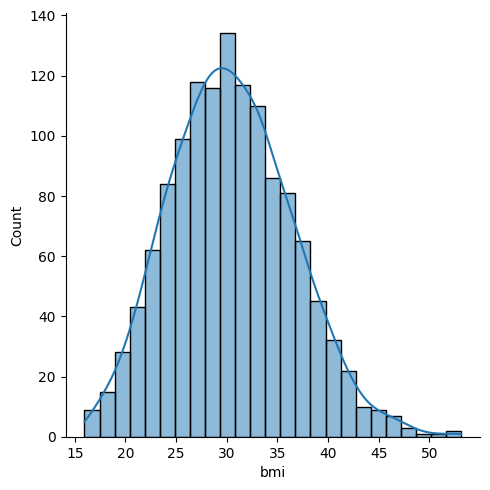

In [78]:
sns.displot(df['bmi'],kde = True)

In [79]:
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])
# df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

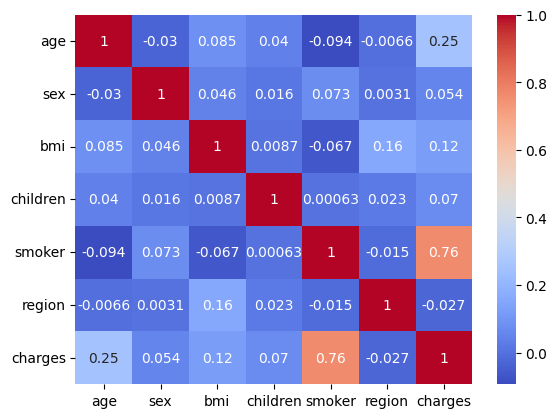

In [80]:
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')
plt.show()

<Axes: >

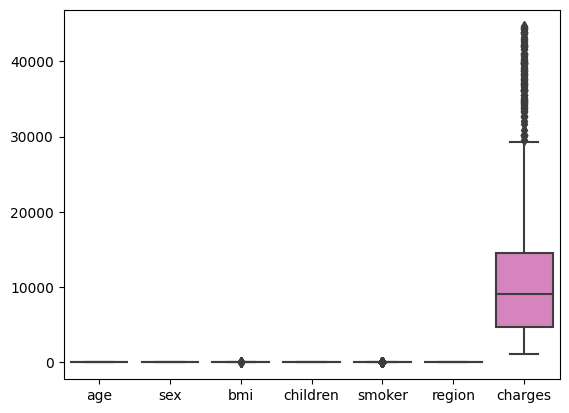

In [81]:
sns.boxplot(df)

In [82]:
df[df['bmi'] > 48]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.3254
286,46,0,48.07,2,0,0,9432.9253
847,23,1,50.38,1,0,2,2438.0552
1047,22,1,52.58,1,1,2,44501.3982
1317,18,1,53.13,0,0,2,1163.4627


In [83]:
# df.drop([847,1047,1317],inplace = True)
# df.drop([116,286],inplace = True)


In [84]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,38.790608,0.502694,30.462002,1.091609,0.181678,1.509623,12228.136048
std,13.916132,0.500185,6.022247,1.207354,0.385728,1.107695,10556.665871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.125000,0.000000,0.000000,1.000000,4664.447000
50%,39.000000,1.000000,30.140000,1.000000,0.000000,2.000000,9095.068250
75%,51.000000,1.000000,34.355000,2.000000,0.000000,2.000000,14581.261425
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,44641.197400


In [85]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df[['charges']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [87]:
ypred = forest.predict(xtest)
data = pd.DataFrame(data={"Predicted Premium Amount": ypred})
data

,Predicted Premium Amount
0,34185.745067
1,15331.980764
2,6605.600517
3,6581.841610
4,10694.788836
...,...
255,12925.174961
256,3326.536802
257,14123.545586
258,2637.576720


In [88]:
# Linear Model
reg = linear_model.LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [89]:
regp = reg.predict(xtest)

In [90]:
# RMSE of RandomForest
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(ytest, ypred))
print("RMSE:", rmse)

RMSE: 4535.798810700514


In [91]:
# RMSE of LinearRegression
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(ytest, regp))
print("RMSE:", rmse)

RMSE: 5424.394250532813
